# Importing Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Dataset 1

In [3]:
df = pd.read_csv('NB1.csv')

In [4]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Renaming Columns

In [5]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [6]:
df.rename(columns = {'39': 'Age', ' State-gov': 'Gov', ' 77516': 'col3', ' Bachelors': 'col4', ' 13': 'col5', ' Never-married': 'Marital Status',
       ' Adm-clerical': 'col6', ' Not-in-family': 'col7', ' White': 'col8', ' Male': 'Gender', ' 2174': 'col10', ' 0': 'col11',
       ' 40': 'col11', ' United-States': 'Country', ' <=50K': 'Salary'}, inplace = True)

### Checking for null values

In [7]:
df.isnull().sum()

Age               0
Gov               0
col3              0
col4              0
col5              0
Marital Status    0
col6              0
col7              0
col8              0
Gender            0
col10             0
col11             0
col11             0
Country           0
Salary            0
dtype: int64

### Checking for outliers

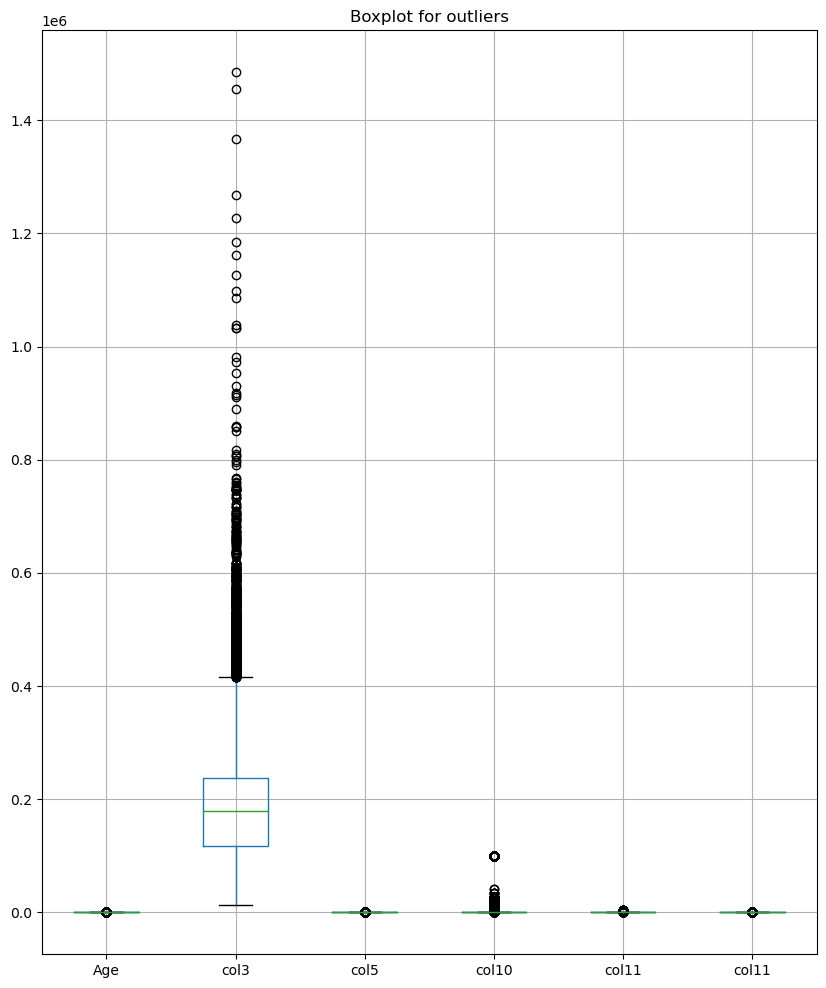

In [8]:
plt.figure(figsize = (10, 12))
df.boxplot()
plt.title('Boxplot for outliers')
plt.show()

In [9]:
def outlier_rem(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = (df[col]<lower) | (df[col]>upper)
    df.loc[outliers, col] = np.mean(df[col])

In [10]:
df.columns

Index(['Age', 'Gov', 'col3', 'col4', 'col5', 'Marital Status', 'col6', 'col7',
       'col8', 'Gender', 'col10', 'col11', 'col11', 'Country', 'Salary'],
      dtype='object')

In [11]:
outlier_rem(df, 'col3')

In [12]:
outlier_rem(df, 'col10')

### Label Encoding

In [13]:
le = LabelEncoder()

In [14]:
cols = df.select_dtypes(include = ['object']).columns

In [15]:
for col in cols:
    df[col] = le.fit_transform(df[col])

In [16]:
df

,Age,Gov,col3,col4,col5,Marital Status,col6,col7,col8,Gender,col10,col11,col11,Country,Salary
0,50,6,83311.0,9,13,2,4,0,4,1,0.000000,0,13,39,0
1,38,4,215646.0,11,9,0,6,1,4,1,0.000000,0,40,39,0
2,53,4,234721.0,1,7,2,6,0,2,1,0.000000,0,40,39,0
3,28,4,338409.0,9,13,2,10,5,2,0,0.000000,0,40,5,0
4,37,4,284582.0,12,14,2,4,5,4,0,0.000000,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302.0,7,12,2,13,5,4,0,0.000000,0,38,39,0
32556,40,4,154374.0,11,9,2,7,0,4,1,0.000000,0,40,39,1
32557,58,4,151910.0,11,9,6,1,4,4,0,0.000000,0,40,39,0
32558,22,4,201490.0,11,9,4,1,3,4,1,0.000000,0,20,39,0


## Visualizing the Correlation Matrix with a heatmap

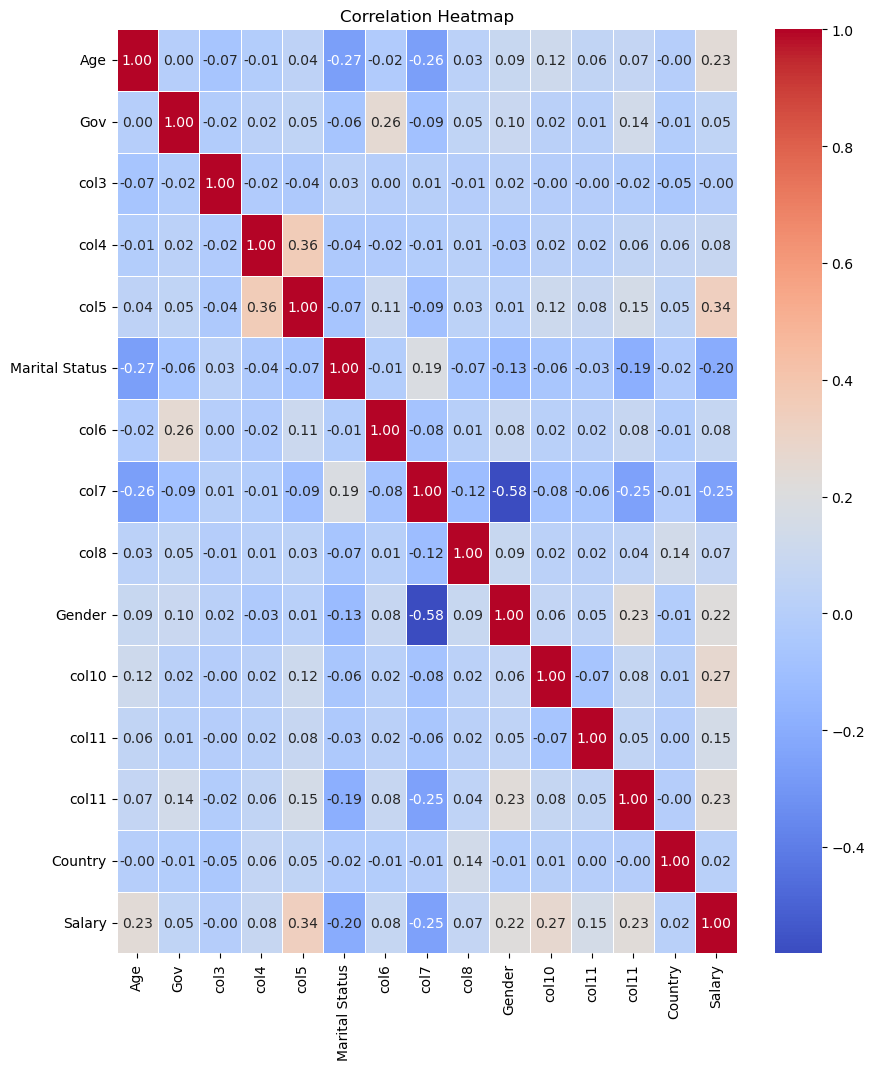

In [17]:
plt.figure(figsize = (10, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = .5)
plt.title('Correlation Heatmap')
plt.show()

### Declaring Feature and Target variables

In [18]:
X = df.drop(columns = 'Salary')
y = df['Salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Creating Multinomial Naive Bayes Classifier

In [20]:
NB = MultinomialNB()

In [21]:
NB.fit(X_train, y_train)

MultinomialNB()

### Predicting the y_test values using Naive Bayes Classifier Model

In [22]:
y_pred = NB.predict(X_test)

## Accuracy Score

In [23]:
acc = accuracy_score(y_test, y_pred)

In [24]:
acc

0.7836302211302212

## Classification Report

In [25]:
report = classification_report(y_test, y_pred)

In [26]:
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.93      0.87      4912\n           1       0.61      0.32      0.42      1600\n\n    accuracy                           0.78      6512\n   macro avg       0.71      0.63      0.64      6512\nweighted avg       0.76      0.78      0.76      6512\n'

## Classification Error

In [27]:
cm = confusion_matrix(y_test, y_pred)

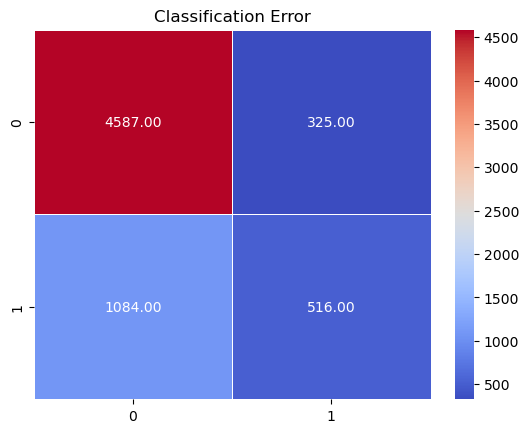

In [226]:
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = .5)
plt.title('Classification Error')
plt.show()

## Predicting Class Probablilities

In [41]:
class_probabilities = NB.predict_proba(X_test)

In [42]:
columns = [f'Class_{i}_probability' for i in range(NB.classes_.shape[0])]

In [43]:
probabilities_df = pd.DataFrame(class_probabilities, columns = columns)

## Histogram of Predicted Probabilities

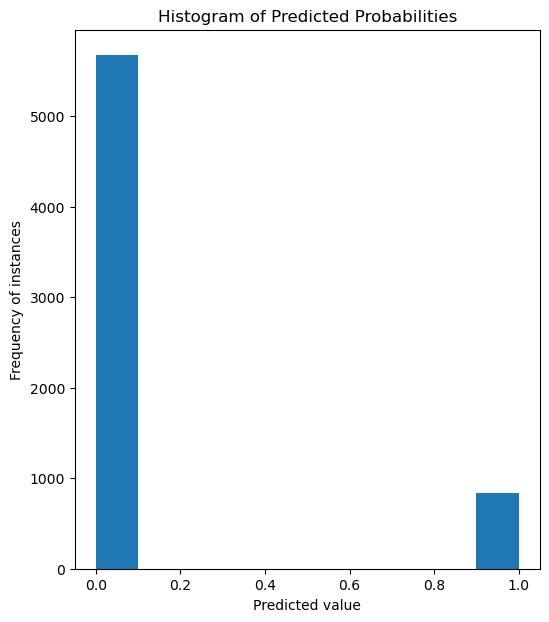

In [227]:
plt.figure(figsize = (6,7))
plt.hist(y_pred)
plt.xlabel('Predicted value')
plt.ylabel('Frequency of instances')
plt.title("Histogram of Predicted Probabilities")
plt.show()

## ROC Curve

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

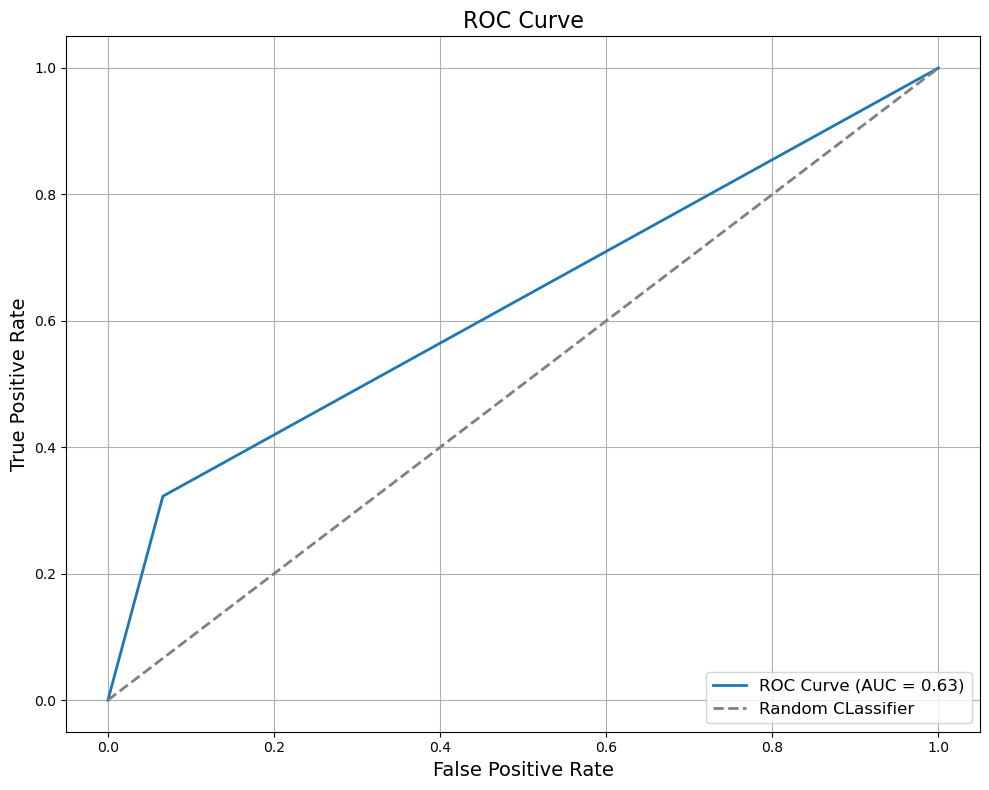

In [59]:
plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = {:.2f})'.format(auc(fpr, tpr)), linewidth = 2)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Random CLassifier', linewidth = 2)
plt.title('ROC Curve', fontsize = 16)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Computing ROC_AUC Score

In [62]:
roc_auc = roc_auc_score(y_test, y_pred)

In [63]:
print(f'The ROC AUC score is : {roc_auc : .2f}')

The ROC AUC score is :  0.63


## Calculating Cross Validated ROC AUC

In [66]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [72]:
roc_auc_scores = cross_val_score(NB, X, y, cv = cv, scoring = make_scorer(roc_auc_score))

In [76]:
print(f'The ROC AUC per fold is : {roc_auc_scores}')

 THe ROC AUC per fold is : [0.62378538 0.615993   0.61227482 0.62185663 0.6276162 ]


In [78]:
print(f'The mean ROC AUC score is : {roc_auc_scores.mean()}')

The mean ROC AUC score is : 0.6203052064582606


## Applying 10 fold cross validation

In [79]:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [80]:
roc_auc_scores = cross_val_score(NB, X, y, cv = cv, scoring = make_scorer(roc_auc_score))

In [83]:
print(f'The ROC AUC score per fold is : {roc_auc_scores}')

The ROC AUC score per fold is : [0.62219099 0.62537976 0.61992066 0.61206534 0.61531603 0.60923362
 0.62556552 0.61814774 0.61730566 0.63792039]


## Computing the Average validation score

In [84]:
print(f'The Mean ROC AUC score is : {roc_auc_scores.mean()}')

The Mean ROC AUC score is : 0.6203045708005562


# Dataset 2

In [194]:
df = pd.read_csv('NB2.csv')

## Exploratory Data Analysis

### Checking for null values

In [195]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [196]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Checking for outliers

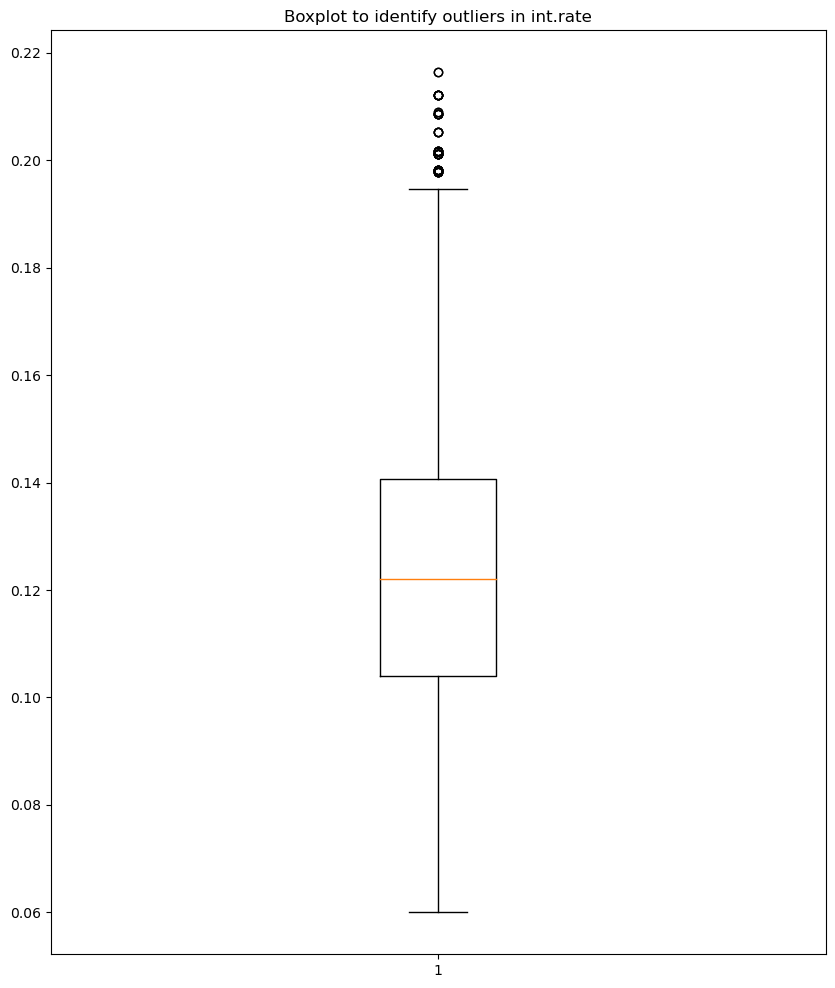

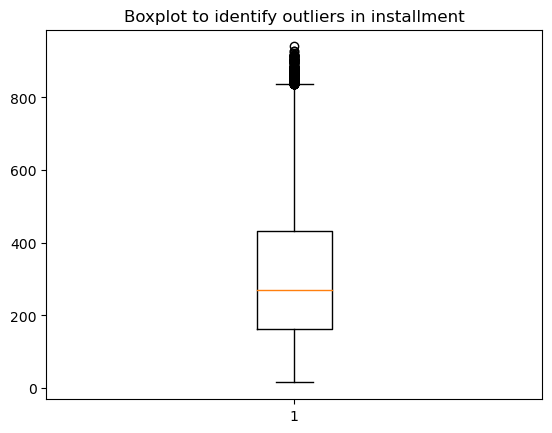

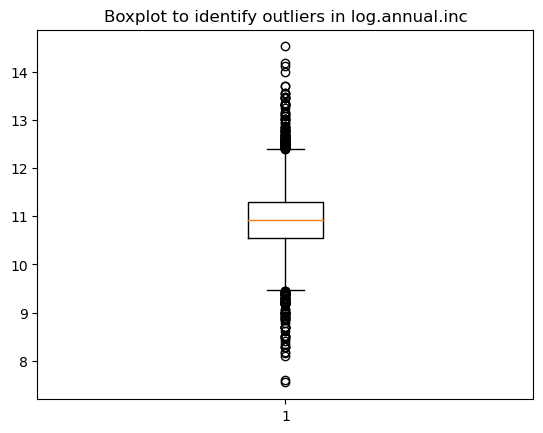

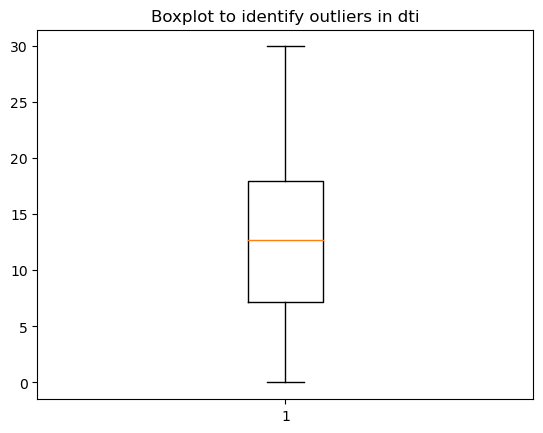

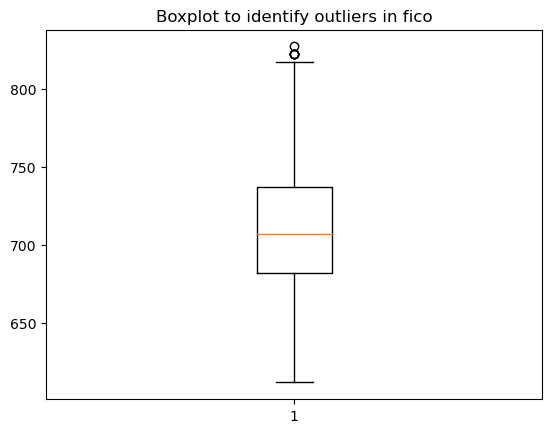

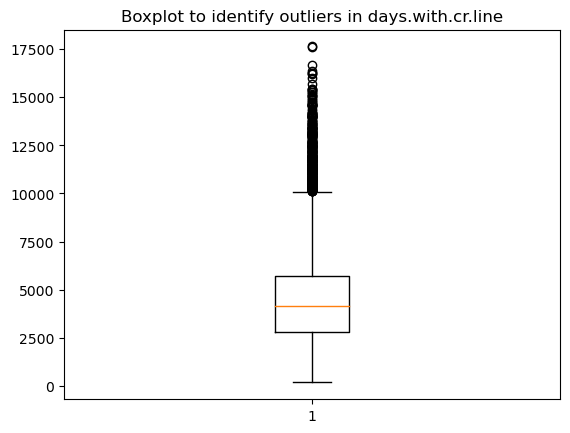

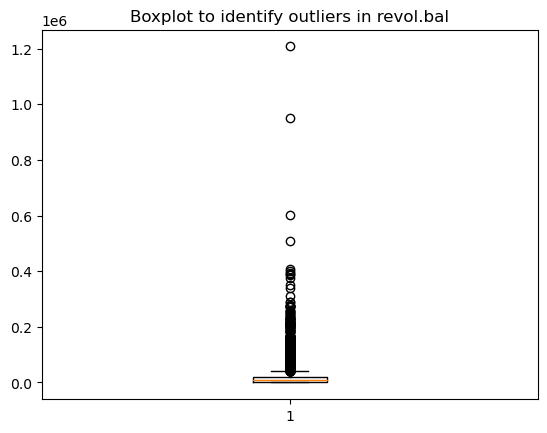

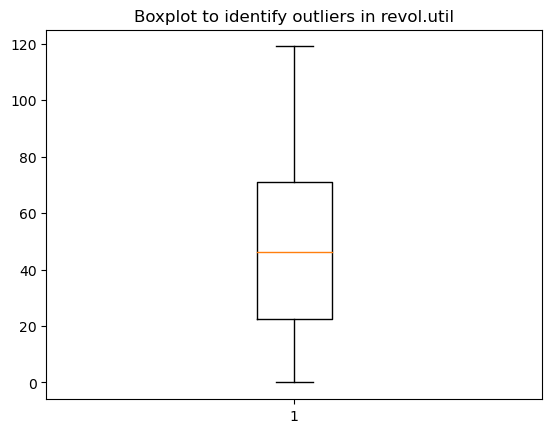

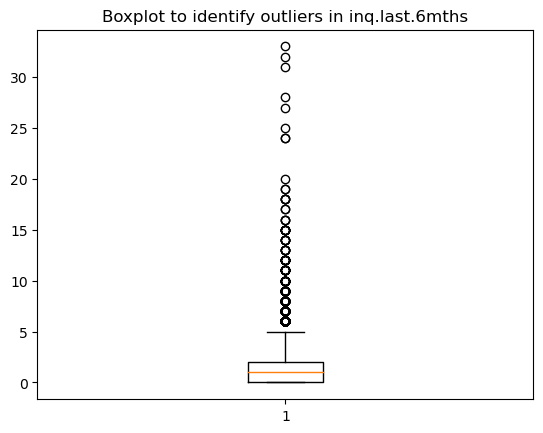

In [198]:
plt.figure(figsize = (10, 12))
cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths']

for col in cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot to identify outliers in {col}")
    plt.show()



### Creating my favorite Outlier_rem function

In [199]:
def outlier_rem(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    
    IQR = Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = (df[col]<lower) | (df[col]>upper)
    
    df.loc[outliers, col] = np.mean(df[col])

In [200]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [201]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [202]:
cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths']

for col in cols:
    outlier_rem(df, col)

In [203]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.100000,11.350407,19.48,737.0,5639.958333,28854.000000,52.1,0.000000,0,0,0
1,1,credit_card,0.1071,228.220000,11.082143,14.29,707.0,2760.000000,33623.000000,76.7,0.000000,0,0,0
2,1,debt_consolidation,0.1357,366.860000,10.373491,11.63,682.0,4710.000000,3511.000000,25.6,1.000000,0,0,0
3,1,debt_consolidation,0.1008,162.340000,11.350407,8.10,712.0,2699.958333,33667.000000,73.2,1.000000,0,0,0
4,1,credit_card,0.1426,102.920000,11.299732,14.97,667.0,4066.000000,4740.000000,39.5,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.760000,12.180755,10.39,672.0,4560.767197,16913.963876,82.1,2.000000,0,0,1
9574,0,all_other,0.1253,257.700000,11.141862,0.21,722.0,4380.000000,184.000000,1.1,5.000000,0,0,1
9575,0,debt_consolidation,0.1071,97.810000,10.596635,13.09,687.0,3450.041667,10036.000000,82.9,1.577469,0,0,1
9576,0,home_improvement,0.1600,351.580000,10.819778,19.18,692.0,1800.000000,0.000000,3.2,5.000000,0,0,1


### Label Encoding Categorical Features

In [204]:
le = LabelEncoder()

df['purpose'] = le.fit_transform(df['purpose'])

In [205]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.100000,11.350407,19.48,737.0,5639.958333,28854.000000,52.1,0.000000,0,0,0
1,1,1,0.1071,228.220000,11.082143,14.29,707.0,2760.000000,33623.000000,76.7,0.000000,0,0,0
2,1,2,0.1357,366.860000,10.373491,11.63,682.0,4710.000000,3511.000000,25.6,1.000000,0,0,0
3,1,2,0.1008,162.340000,11.350407,8.10,712.0,2699.958333,33667.000000,73.2,1.000000,0,0,0
4,1,1,0.1426,102.920000,11.299732,14.97,667.0,4066.000000,4740.000000,39.5,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.760000,12.180755,10.39,672.0,4560.767197,16913.963876,82.1,2.000000,0,0,1
9574,0,0,0.1253,257.700000,11.141862,0.21,722.0,4380.000000,184.000000,1.1,5.000000,0,0,1
9575,0,2,0.1071,97.810000,10.596635,13.09,687.0,3450.041667,10036.000000,82.9,1.577469,0,0,1
9576,0,4,0.1600,351.580000,10.819778,19.18,692.0,1800.000000,0.000000,3.2,5.000000,0,0,1


### Dropping Duplicates

In [206]:
df = df.drop_duplicates()

In [207]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.100000,11.350407,19.48,737.0,5639.958333,28854.000000,52.1,0.000000,0,0,0
1,1,1,0.1071,228.220000,11.082143,14.29,707.0,2760.000000,33623.000000,76.7,0.000000,0,0,0
2,1,2,0.1357,366.860000,10.373491,11.63,682.0,4710.000000,3511.000000,25.6,1.000000,0,0,0
3,1,2,0.1008,162.340000,11.350407,8.10,712.0,2699.958333,33667.000000,73.2,1.000000,0,0,0
4,1,1,0.1426,102.920000,11.299732,14.97,667.0,4066.000000,4740.000000,39.5,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.760000,12.180755,10.39,672.0,4560.767197,16913.963876,82.1,2.000000,0,0,1
9574,0,0,0.1253,257.700000,11.141862,0.21,722.0,4380.000000,184.000000,1.1,5.000000,0,0,1
9575,0,2,0.1071,97.810000,10.596635,13.09,687.0,3450.041667,10036.000000,82.9,1.577469,0,0,1
9576,0,4,0.1600,351.580000,10.819778,19.18,692.0,1800.000000,0.000000,3.2,5.000000,0,0,1


### Renaming Columns

In [208]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [209]:
# Note : There seems to be no need of renaming the columns

## Featue Scaling

In [210]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [211]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

credit.policy : 2
purpose : 7
int.rate : 240
installment : 4678
log.annual.inc : 1877
dti : 2529
fico : 43
days.with.cr.line : 2422
revol.bal : 7096
revol.util : 1035
inq.last.6mths : 7
delinq.2yrs : 11
pub.rec : 6
not.fully.paid : 2


In [212]:
sc = StandardScaler()

cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths']

for col in cols:
    val = df[col].values.reshape(-1, 1)
    df[col] = sc.fit_transform(val)

In [213]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,-0.126343,2.787077,0.783221,0.998505,0.692564,0.670436,1.984172,0.182704,-0.935078,0,0,0
1,1,1,-0.577161,-0.411898,0.282091,0.244540,-0.099727,-0.760395,2.506772,1.030602,-0.935078,0,0,0
2,1,2,0.515499,0.326196,-1.041702,-0.141885,-0.759970,0.208411,-0.792985,-0.730683,-0.180303,0,0,0
3,1,2,-0.817852,-0.762631,0.783221,-0.654697,0.032321,-0.790226,2.511593,0.909966,-0.180303,0,0,0
4,1,1,0.779113,-1.078972,0.688559,0.343326,-1.156116,-0.111544,-0.658307,-0.251586,-0.935078,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.912830,0.208540,2.334350,-0.322023,-1.024067,0.134268,0.675749,1.216726,0.574471,0,0,1
9574,0,0,0.118168,-0.254952,0.393649,-1.800898,0.296418,0.044459,-1.157566,-1.575135,2.838794,0,0,1
9575,0,2,-0.577161,-1.106177,-0.624860,0.070213,-0.627921,-0.417566,-0.077957,1.244300,0.255555,0,0,1
9576,0,4,1.443878,0.244848,-0.208017,0.954924,-0.495873,-1.237346,-1.177730,-1.502753,2.838794,0,0,1


## Declaring feature And Target Variable

In [214]:
X = df.drop(columns = ['not.fully.paid'])
y = df['not.fully.paid']

## Making a Model and Training it

In [215]:
NB2 = MultinomialNB()

In [216]:
NB2.fit(X_train, y_train)

MultinomialNB()

## Making Predictions

In [217]:
y_pred = NB2.predict(X_test)

## Accuracy Score

In [218]:
acc = accuracy_score(y_test, y_pred)

In [219]:
acc

0.7836302211302212

## Making a Heatmap

In [220]:
cm =confusion_matrix(y_test, y_pred)

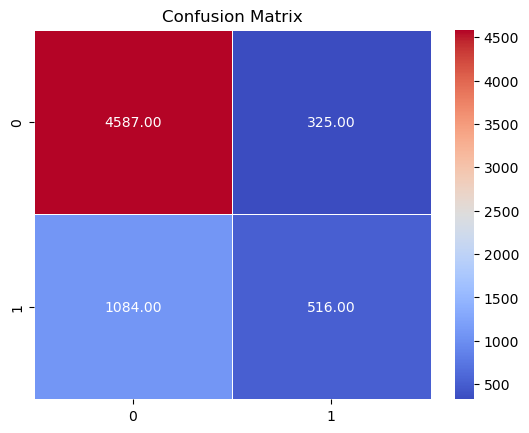

In [225]:
sns.heatmap(cm, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidth = .5)
plt.title('Confusion Matrix')
plt.show()

## Generating CLassification Report

In [228]:
cr = classification_report(y_test, y_pred)

In [229]:
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4912
           1       0.61      0.32      0.42      1600

    accuracy                           0.78      6512
   macro avg       0.71      0.63      0.64      6512
weighted avg       0.76      0.78      0.76      6512



## Predicting Class Probabilities

In [231]:
class_probabilites = NB2.predict_proba(X_test)
cols = {f'Class_{i}_probability' for i in range(NB2.classes_.shape[0])}
Probabilities_df = pd.DataFrame(class_probabilities, columns = cols)

In [232]:
Probabilities_df

,Class_0_probability,Class_1_probability
0,1.0,1.682078e-152
1,1.0,1.327727e-36
2,1.0,8.462872e-146
3,1.0,8.581094e-244
4,1.0,5.965046e-95
...,...,...
6507,1.0,3.493389e-65
6508,1.0,1.617129e-21
6509,1.0,9.130968e-158
6510,1.0,6.500298e-153


In [233]:
Probabilities_df[(Probabilities_df['Class_0_probability'] == 0)]

,Class_0_probability,Class_1_probability
46,0.0,1.0
52,0.0,1.0
59,0.0,1.0
69,0.0,1.0
74,0.0,1.0
...,...,...
6463,0.0,1.0
6474,0.0,1.0
6480,0.0,1.0
6483,0.0,1.0


In [234]:
Probabilities_df[(Probabilities_df['Class_0_probability'] == 1)]

,Class_0_probability,Class_1_probability
0,1.0,1.682078e-152
1,1.0,1.327727e-36
2,1.0,8.462872e-146
3,1.0,8.581094e-244
4,1.0,5.965046e-95
...,...,...
6507,1.0,3.493389e-65
6508,1.0,1.617129e-21
6509,1.0,9.130968e-158
6510,1.0,6.500298e-153


In [235]:
Probabilities_df[(Probabilities_df['Class_1_probability'] == 0)]

,Class_0_probability,Class_1_probability
148,1.0,0.0
260,1.0,0.0
334,1.0,0.0
375,1.0,0.0
390,1.0,0.0
665,1.0,0.0
666,1.0,0.0
756,1.0,0.0
849,1.0,0.0
851,1.0,0.0


In [236]:
Probabilities_df[(Probabilities_df['Class_1_probability'] == 1)]

,Class_0_probability,Class_1_probability
46,0.0,1.0
52,0.0,1.0
59,0.0,1.0
69,0.0,1.0
74,0.0,1.0
...,...,...
6463,0.0,1.0
6474,0.0,1.0
6480,0.0,1.0
6483,0.0,1.0


## Histogram for Predicted Probabilites

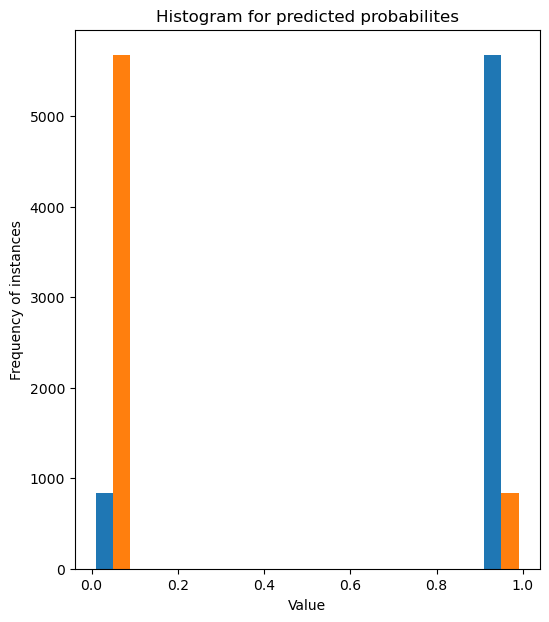

In [239]:
plt.figure(figsize = (6, 7))
plt.hist(Probabilities_df)
plt.title('Histogram for predicted probabilites')
plt.xlabel('Value')
plt.ylabel('Frequency of instances')
plt.show()

## Plotting ROC Curve

In [240]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

[]

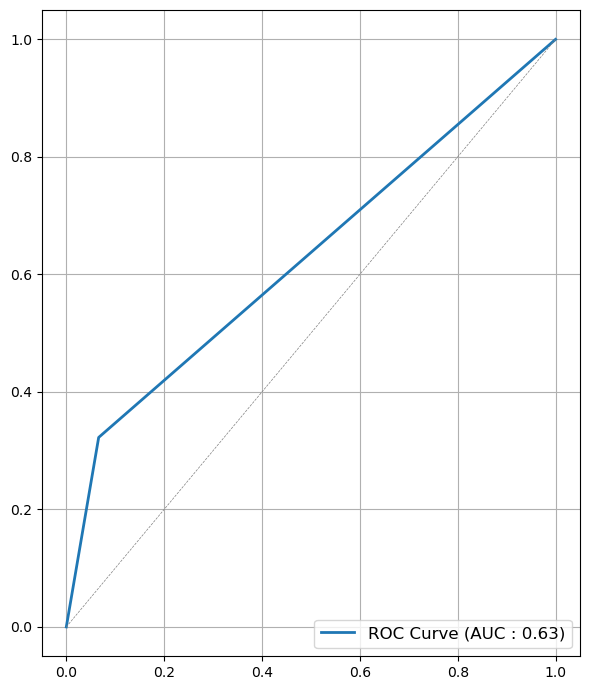

In [250]:
plt.figure(figsize = (6, 7))
plt.plot(fpr, tpr, label = 'ROC Curve (AUC : {:.2f})'.format(auc(fpr, tpr)), linewidth = 2)
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--', linewidth = .5)
plt.grid(True)
plt.tight_layout()
plt.legend(loc = 'lower right', fontsize = 12)
plt.plot()

## Computing ROC AUC

In [251]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'The ROC AUC score is : {roc_auc : .2f}')

The ROC AUC score is :  0.63


## Calculating Cross Validated ROC AUC

In [255]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
roc_auc_scores = cross_val_score(NB2, X, y, cv = cv, scoring = make_scorer(roc_auc_score))
print(f'The ROC AUC per fold is : {roc_auc_scores}')
print(f'The mean ROC AUC score is : {roc_auc_scores.mean()}')

The ROC AUC per fold is : [nan nan nan nan nan]
The mean ROC AUC score is : nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 863, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\ProgramData\Anaconda3\lib\site-package

## Applying 10 fold cross validation

In [258]:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
roc_auc_scores = cross_val_score(NB, X, y, cv = cv, scoring = make_scorer(roc_auc_score))

print(f'The ROC AUC score per fold is : {roc_auc_scores}')

The ROC AUC score per fold is : [nan nan nan nan nan nan nan nan nan nan]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 863, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\ProgramData\Anaconda3\lib\site-pack

## Computing the Average validation score

In [261]:
print(f'The Mean ROC AUC score is : {roc_auc_scores.mean()}')

The Mean ROC AUC score is : nan


# THE END